In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

core = pd.read_csv("bgg.csv")
core.mechanic = core.mechanic.map(eval)
core.designer = core.designer.map(eval)
#core.designer.map(len).sort_values().value_counts()
len(core)#.designer.drop_duplicates().map(len).sort_values().value_counts().iloc[3:].cumsum()


18965

In [37]:
designer = len(core.designer.explode().unique())
designer_gender_avg = 0.79
teams = len(core.designer.map(tuple).unique())
teamsize_max = core.designer.map(sorted).map(tuple).drop_duplicates().map(len).max()
teamsize_mean = core.designer.map(sorted).map(tuple).drop_duplicates().map(len).mean()
mechanics = len(core.mechanic.explode().unique())
mechanic_combinations = len(core.mechanic.unique())

# Creating a dictionary with the provided values
data = {
    "Variable": [
        "Number of Designers",
        "Average Designer Gender (0=F,1=M)",
        "Number of Teams",
        "Max Team Size",
        "Mean Team Size",
        "Number of Mechanics",
        "Number of Mechanic Combinations"
    ],
    "Value": [
        designer,
        designer_gender_avg,
        teams,
        teamsize_max,
        teamsize_mean,
        mechanics,
        mechanic_combinations
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df = df.round(2)
# Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=False)

# Save to a .tex file
with open('../results/design_mechanics_metrics.tex', 'w') as f:
    f.write(latex_table)

latex_table

'\\begin{tabular}{lr}\n\\toprule\nVariable & Value \\\\\n\\midrule\nNumber of Designers & 10945.000000 \\\\\nAverage Designer Gender (0=F,1=M) & 0.790000 \\\\\nNumber of Teams & 10149.000000 \\\\\nMax Team Size & 26.000000 \\\\\nMean Team Size & 1.630000 \\\\\nNumber of Mechanics & 192.000000 \\\\\nNumber of Mechanic Combinations & 10403.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

<h1> Considerations

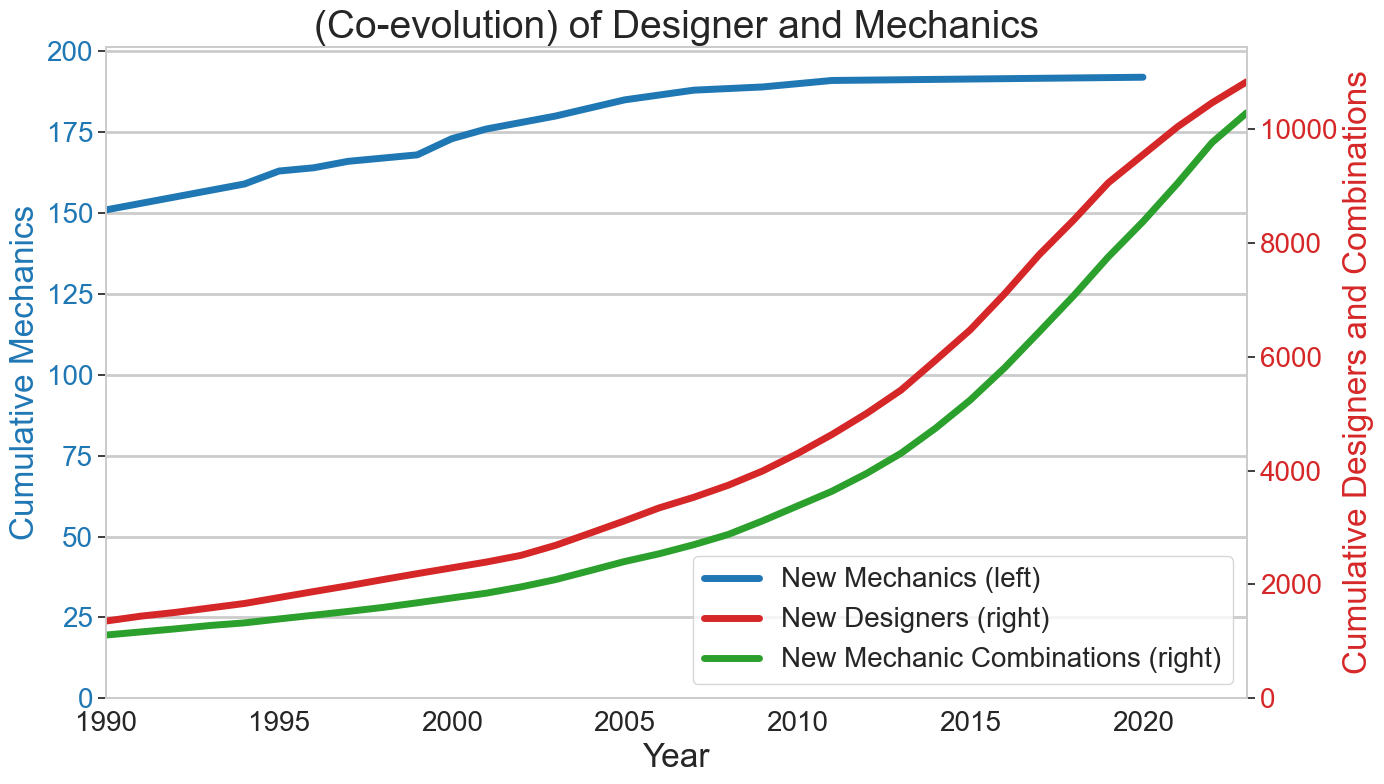

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate cumulative counts
mechanics = core[["year", "mechanic"]].explode("mechanic").sort_values("year").drop_duplicates(subset="mechanic").groupby("year").apply(len).cumsum()
designers = core[["year", "designer"]].explode("designer").sort_values("year").drop_duplicates(subset="designer").groupby("year").apply(len).cumsum()
mechanic_combinations = core[["year", "mechanic"]].sort_values("year").drop_duplicates(subset="mechanic").groupby("year").apply(len).cumsum()

# Define a scaling factor
scale_factor = 1.0

# Plotting
fig, ax1 = plt.subplots(figsize=(14 , 8))  # Scale figure size

sns.set(style="whitegrid")

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=24 * scale_factor)
ax1.set_ylabel('Cumulative Mechanics', color=color, fontsize=24 * scale_factor)
sns.lineplot(data=mechanics, ax=ax1, color=color, label='New Mechanics (left)', legend=False, linewidth=5 * scale_factor)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20 * scale_factor)
ax1.tick_params(axis='x', labelsize=20 * scale_factor)
ax1.grid(False)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Designers and Combinations', color=color, fontsize=24 * scale_factor)
sns.lineplot(data=designers, ax=ax2, color=color, label='New Designers (right)', linewidth=5 * scale_factor)
sns.lineplot(data=mechanic_combinations, ax=ax2, color='tab:green', label='New Mechanic Combinations (right)', linewidth=5 * scale_factor)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20 * scale_factor)

# Ensure the grids are aligned
ax1.yaxis.grid(True, linewidth=2 * scale_factor)
ax2.grid(False, which='both')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right', bbox_to_anchor=(1, 0), fontsize=20 * scale_factor, title_fontsize=24 * scale_factor)

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.set_xlim(left=1990, right=2023)
ax2.set_xlim(left=1990, right=2023)

plt.title("(Co-evolution) of Designer and Mechanics", fontsize=28 * scale_factor)
fig.tight_layout()
plt.show()

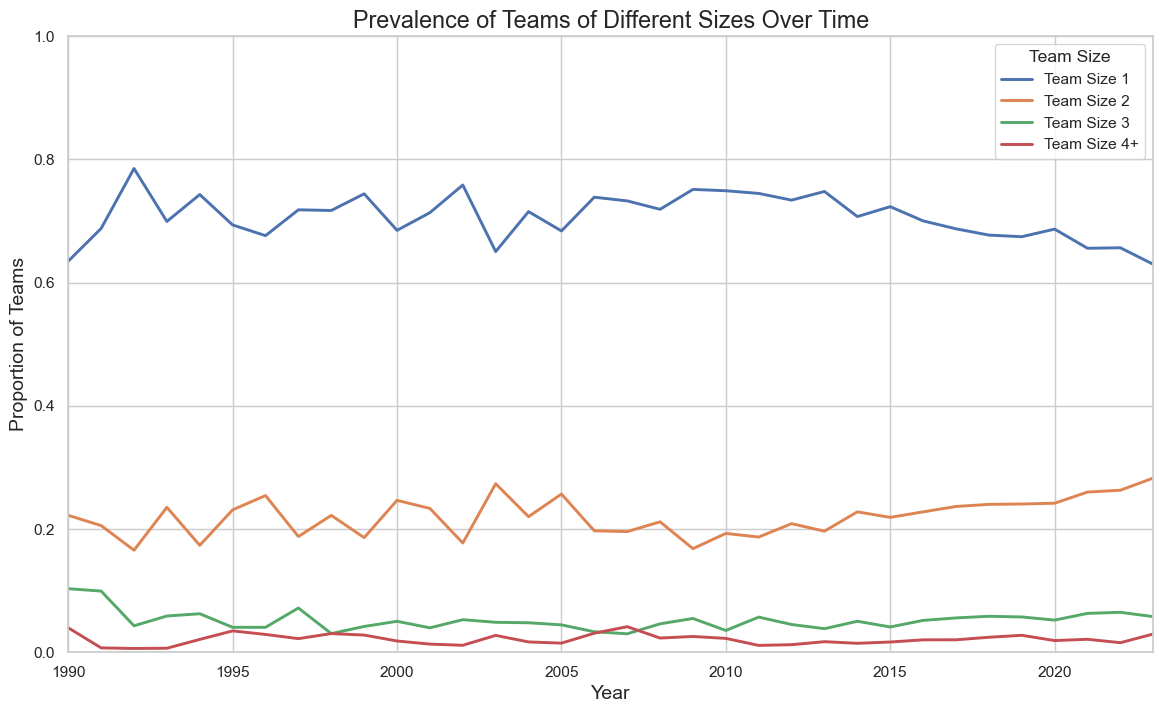

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `core` is your DataFrame and it contains the columns "year" and "designer"
# Create a column with the number of designers per game
core['team_size'] = core['designer'].apply(lambda x: len(x) if isinstance(x, list) else 1)

# Categorize team sizes
core['team_size_category'] = core['team_size'].apply(lambda x: str(x) if x <= 3 else '4+')

# Calculate the prevalence of each team size category per year
team_size_prevalence = core.groupby(['year', 'team_size_category']).size().unstack(fill_value=0)

# Normalize the prevalence to get the proportion of each team size per year
team_size_prevalence = team_size_prevalence.div(team_size_prevalence.sum(axis=1), axis=0)

# Define a scaling factor
scale_factor = 0.7

# Plotting
fig, ax1 = plt.subplots(figsize=(14 , 8))  # Scale figure size
sns.set(style="whitegrid")

# Plotting each team size category as a line plot with increased line width
for column in team_size_prevalence.columns:
    sns.lineplot(data=team_size_prevalence[column], label=f'Team Size {column}', linewidth=3 * scale_factor)  # Scale line width

# Scale font sizes for labels, title, and legend
plt.xlabel('Year', fontsize=20 * scale_factor)
plt.ylabel('Proportion of Teams', fontsize=20 * scale_factor)
plt.title('Prevalence of Teams of Different Sizes Over Time', fontsize=24 * scale_factor)
plt.legend(title='Team Size', title_fontsize=18 * scale_factor, fontsize=16 * scale_factor)
plt.xticks(fontsize=16 * scale_factor)
plt.yticks(fontsize=16 * scale_factor)

# Set limits for better readability
plt.xlim(1990, 2023)
plt.ylim(0, 1)

# Increase grid line width
plt.grid(True, linewidth=1.5 * scale_factor)

plt.show()

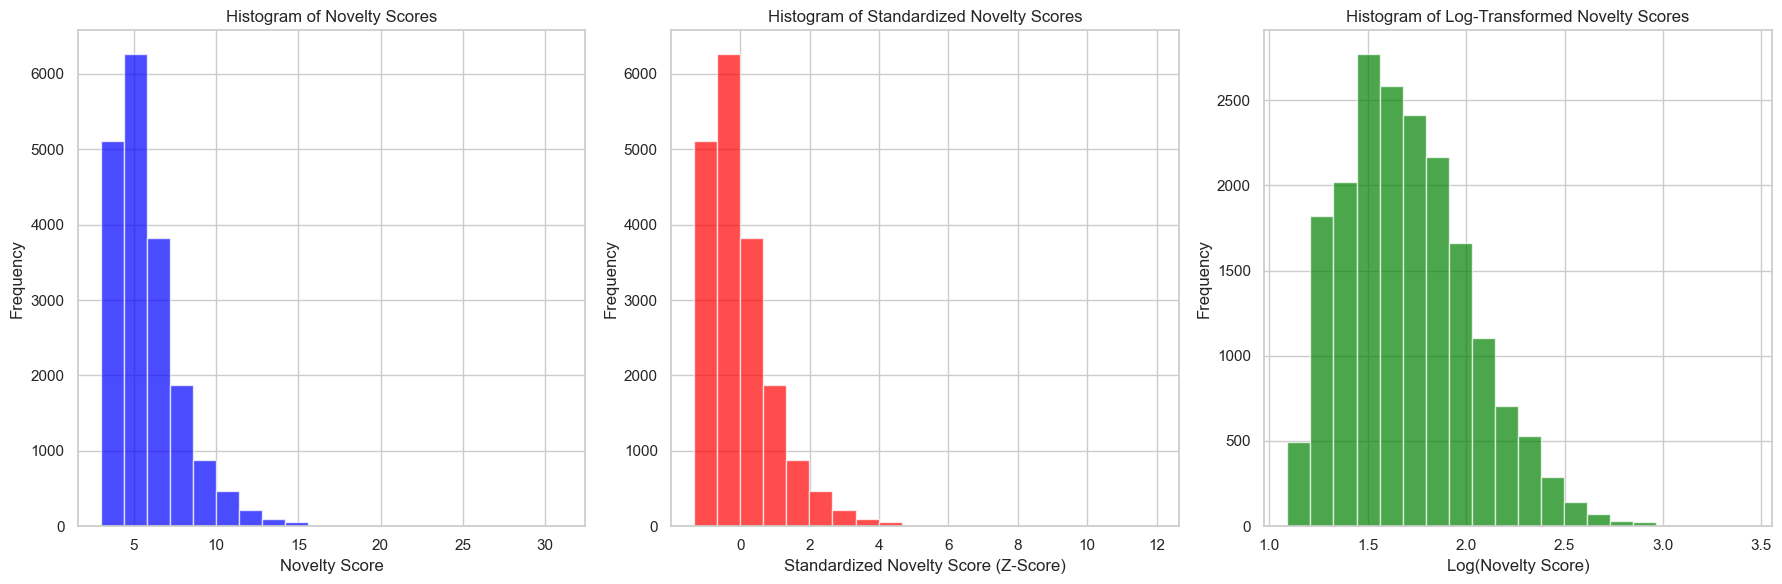

In [5]:
import numpy as np
import matplotlib.pyplot as plt

novelty = core.novelty

# Apply logarithm to novelty scores
novelty_log = np.log(novelty)

# Standardize the novelty scores (z-score normalization)
novelty_standardized = (novelty - np.mean(novelty)) / np.std(novelty)

# Plot the histograms
plt.figure(figsize=(18, 6))

# Histogram of novelty scores
plt.subplot(1, 3, 1)
plt.hist(novelty, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Novelty Scores')
plt.xlabel('Novelty Score')
plt.ylabel('Frequency')

# Histogram of standardized novelty scores
plt.subplot(1, 3, 2)
plt.hist(novelty_standardized, bins=20, color='red', alpha=0.7)
plt.title('Histogram of Standardized Novelty Scores')
plt.xlabel('Standardized Novelty Score (Z-Score)')
plt.ylabel('Frequency')

# Histogram of log-transformed novelty scores
plt.subplot(1, 3, 3)
plt.hist(novelty_log, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Log-Transformed Novelty Scores')
plt.xlabel('Log(Novelty Score)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()